# **Visualization of Multivariate Data**

In [1]:
import pandas as pd
import numpy as np
import plotly_express as px  #plotly express
import seaborn as sns
import matplotlib.pyplot as plt
import re

Load auto mpg dataset from the UCI Machine Learning Repository

In [2]:
#load and clean data
mpg = pd.read_csv('auto-mpg.csv')
mpg.loc[:, 'horsepower'] = mpg['horsepower'].replace(regex=r'[^0-9]', value=np.nan).apply(float)
mpg.dropna(inplace=True)
mpg.loc[:, 'cyl'] = pd.Categorical(mpg['cylinders'])

In [3]:
mpg.shape

(392, 10)

In [4]:
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name cyl  
0          70       1  chevrolet chevelle malibu   8  
1          70       1          buick skylark 320   8  
2          70       1         plymouth satellite   8  
3          70       1              amc rebel sst   8  
4          70       1                ford torino   8

**Attribute Information:**
    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)


### Distributions

In [5]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'cyl'],
      dtype='object')

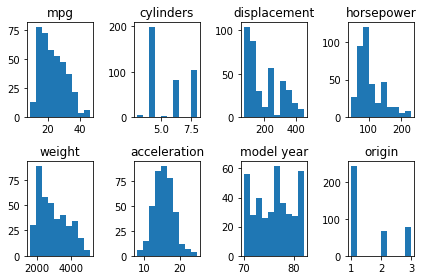

In [6]:
for i, c in enumerate(mpg.columns[:-2]):
    plt.subplot(2,4,i+1)
    plt.hist(mpg[c]);
    plt.title(c);
plt.tight_layout()
plt.show()

### Pairwise Relationships

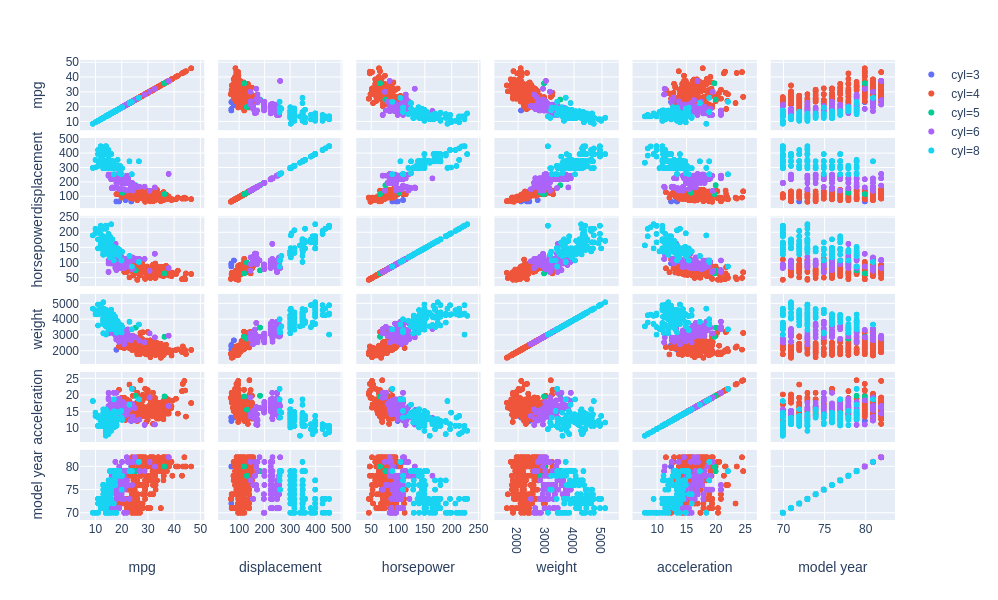

In [7]:
px.scatter_matrix(mpg, 
                  dimensions=['mpg', 'model year', 'displacement', 'weight', 'acceleration', 'horsepower'], 
                  color='cyl', width=900)

In [8]:
correlation = mpg[['mpg', 'model year', 'displacement', 'weight', 'acceleration', 'horsepower']].corr()

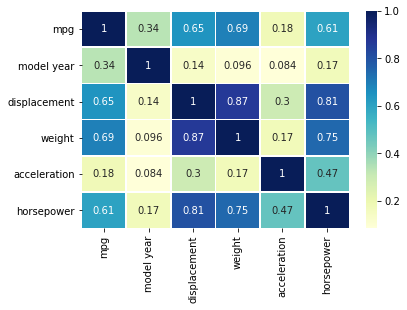

In [9]:
sns.heatmap(correlation**2, linewidths=.5, annot=True, cmap="YlGnBu");

### Plots with Panels

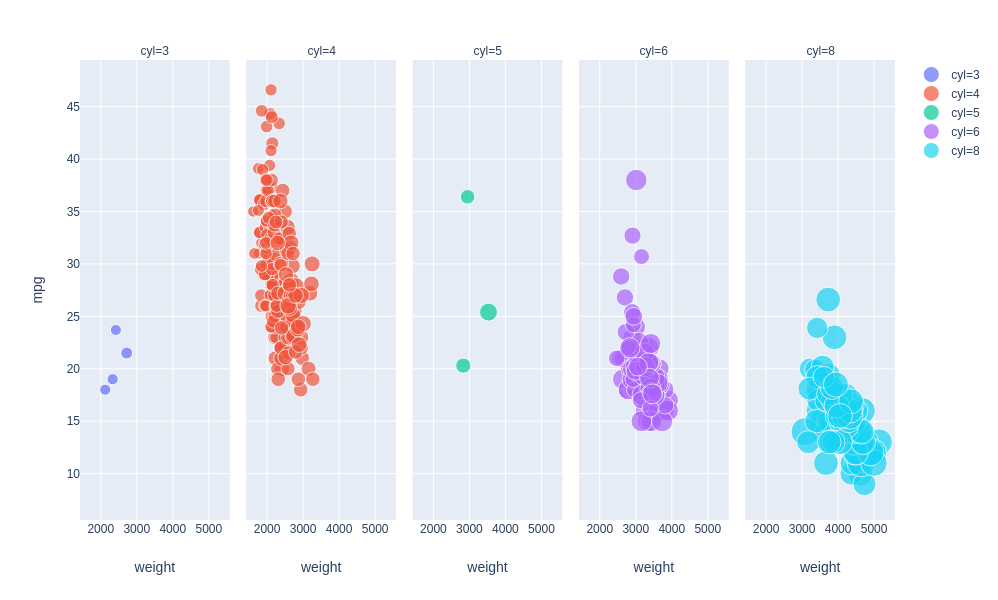

In [10]:
px.scatter(mpg, x="weight", y="mpg", facet_col='cyl', color="cyl",
           size="displacement", hover_name="car name",  width=800)

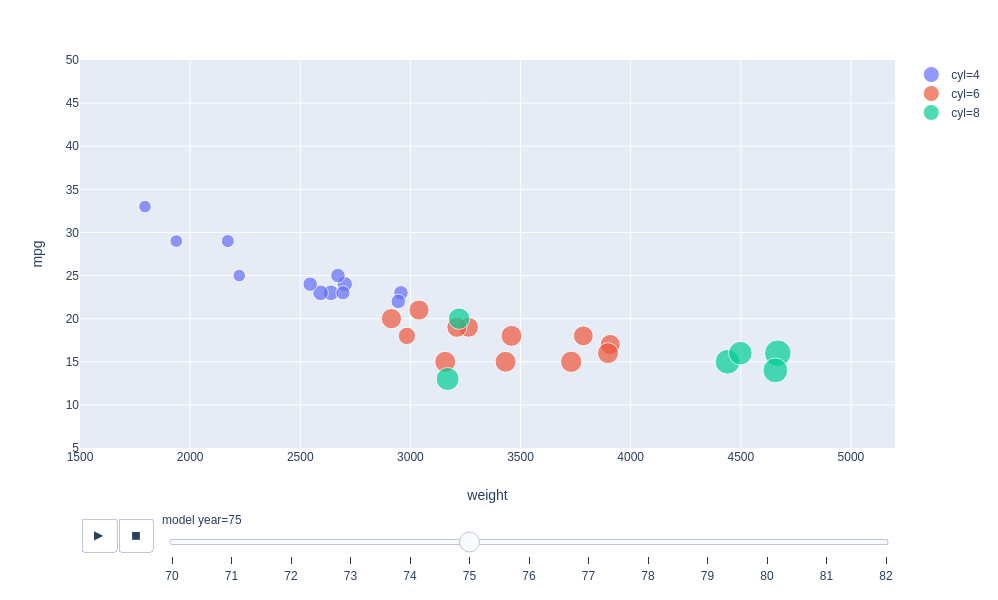

In [11]:
px.scatter(mpg, x="weight", y="mpg", animation_frame="model year", color="cyl",
           size="displacement", hover_name="car name", range_x=[1500, 5200], range_y=[5, 50], width=800)

### Parallel Coordinates

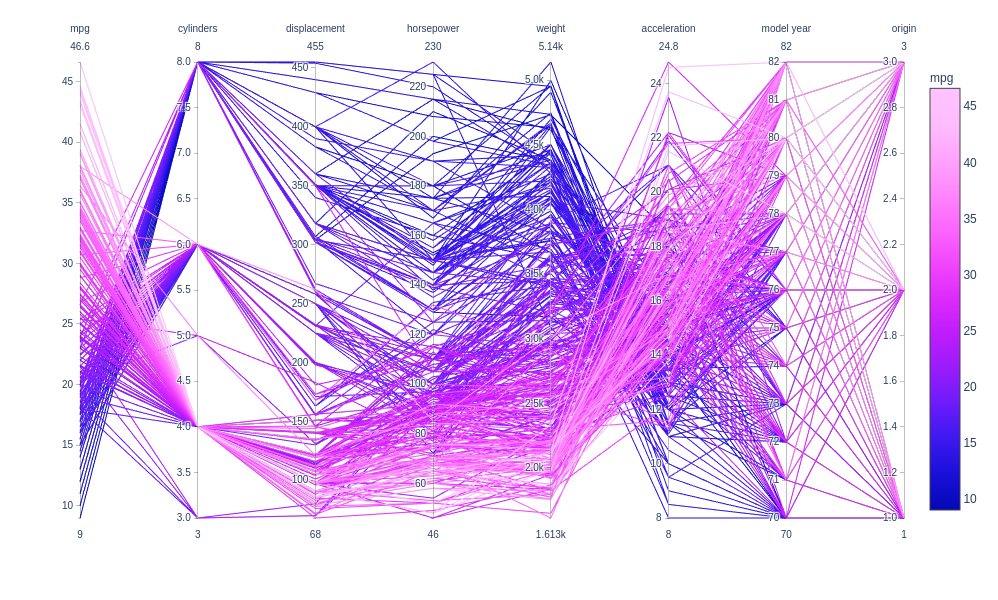

In [12]:
px.parallel_coordinates(mpg, color='mpg', width=900)

### 3D Plots

In [13]:
px.scatter_3d(mpg, x='weight', y='horsepower',z='mpg', color='cyl' )

In [14]:
px.scatter_3d(mpg, x='weight', y='model year',z='mpg', color='cyl' )

## Identify Top Predictors for MPG

In [15]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM regressor
from sklearn.metrics import r2_score, mean_squared_error
import eli5   #permutation importance
from eli5.sklearn import PermutationImportance

In [16]:
X = mpg[['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin']]
y = mpg['mpg']
gbm = GradientBoostingRegressor().fit(X,y)

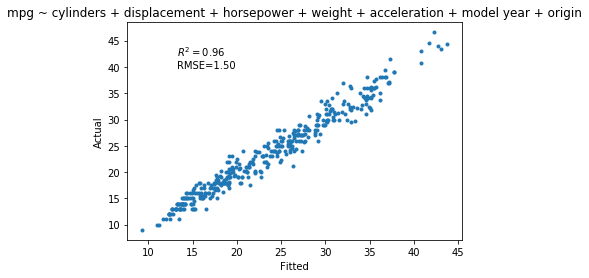

In [17]:
y_pred = gbm.predict(X)
rsquared = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
plt.plot(y_pred, y, '.');
plt.xlabel('Fitted');
plt.ylabel('Actual');
plt.title('mpg ~ '+' + '.join(X.columns))
plt.annotate('$R^2={0:.2f}$\nRMSE={1:.2f}'.format(rsquared, rmse), (0.3, 0.75), xycoords='figure fraction');

In [18]:
perm = PermutationImportance(gbm, random_state=1).fit(X, y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [19]:
importance = pd.DataFrame({'importance': perm.feature_importances_, 'error':perm.feature_importances_std_,'feature':X.columns})

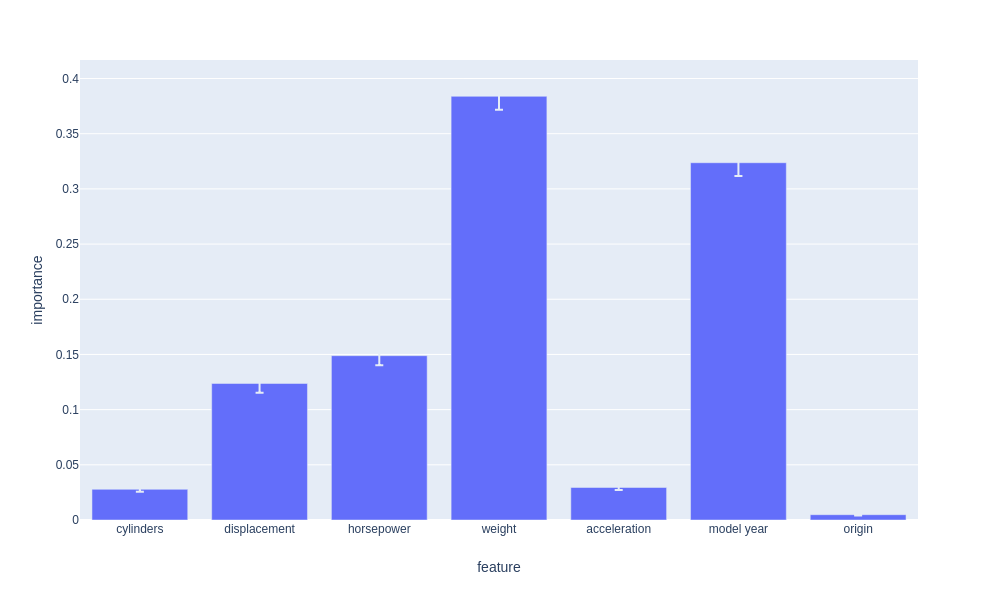

In [20]:
px.bar(importance, x="feature", y="importance", error_y="error", width=700)

In [21]:
def regression_plot(df, x_vars, y_var, regression_model):
    X = df[x_vars]
    y = df[y_var]
    reg = regression_model().fit(X,y)
    y_pred = reg.predict(X)
    rsquared = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    plt.plot(y_pred, y, '.');
    plt.xlabel('Fitted');
    plt.ylabel('Actual');
    plt.title('mpg ~ '+' + '.join(X.columns))
    plt.annotate('$R^2={0:.2f}$\nRMSE={1:.2f}'.format(rsquared, rmse), (0.3, 0.75), xycoords='figure fraction');

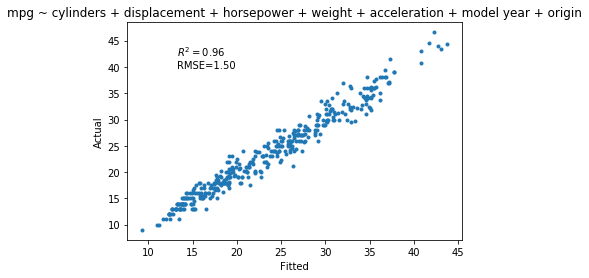

In [22]:
regression_plot(mpg, ['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin'], 
                'mpg', GradientBoostingRegressor)

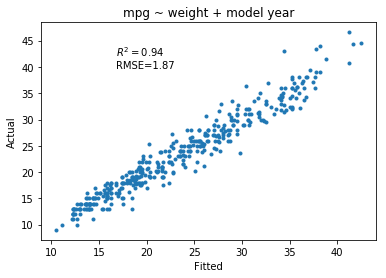

In [23]:
regression_plot(mpg, ['weight', 'model year'], 'mpg', GradientBoostingRegressor)

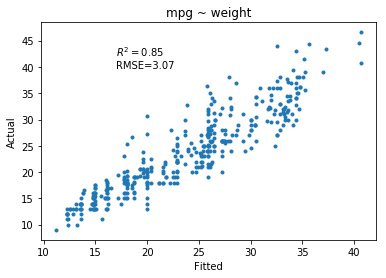

In [24]:
regression_plot(mpg, ['weight'], 'mpg', GradientBoostingRegressor)